In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Correlations and Scatter of Assets

In [6]:
sp500_tmp=yf.download('^GSPC')
GLD_tmp=yf.download('GLD')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Correlation: -0.04106670568134156


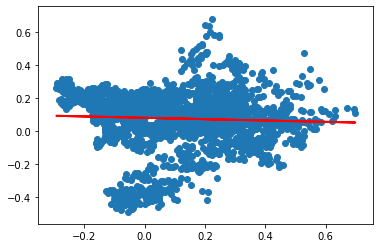

In [7]:
GLD = GLD_tmp['Close']
sp500 = sp500_tmp['Close']

assets = pd.concat([GLD, sp500], axis=1)
assets = assets.dropna()
assets.columns = ["GLD", "SP500"]

assets = assets.pct_change(250)
assets = assets.dropna()

regressor = LinearRegression()  
regressor.fit(assets["GLD"].values.reshape(-1,1), assets["SP500"].values.reshape(-1,1))

y_pred = regressor.predict(assets["GLD"].values.reshape(-1,1))

plt.scatter(assets['GLD'], assets['SP500'])
plt.plot(assets['GLD'], y_pred, color='red', linewidth=2)

print("Correlation: " + str(float(regressor.coef_)))